In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Salary_data_cleaned.csv')

In [3]:
# view first 5 rows
df.head(5)

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,AVR salary,company text,job_state,same_state,age,python_yn,RStudio_yn,spark,aws,excel
0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\r\n\r\nAt Hopper, we’re on a miss...",3.5,Hopper\r\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,...,146.0,Hopper\r\n,NY,0,18,0,0,0,0,0
1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\r\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,...,146.0,Noom US\r\n,NY,1,17,1,0,0,0,1
2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\r\n\r\nhttps://www.decode-m.com/\r\n\...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,...,146.0,Decode_M,NY,1,-1,1,0,0,0,1
3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\r\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,...,146.0,Sapphire Digital\r\n,NJ,1,6,1,0,0,0,1
4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\r\nDescripti...",3.4,United Entertainment Group\r\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,...,146.0,United Entertainment Group\r\n,NY,1,18,1,0,0,0,1


In [4]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'hourly', 'employer provided', 'min salary', 'max salary',
       'AVR salary', 'company text', 'job_state', 'same_state', 'age',
       'python_yn', 'RStudio_yn', 'spark', 'aws', 'excel'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

In [6]:
def senority(title):
    if any(keyword in title.lower() for keyword in ['sr', 'senior', 'lead', 'principal']):
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
        

In [7]:
## split the 'Job Title' and 'Senority' and Grouping similar category
# grouping and simplifying Job
df['job_simp'] = df['Job Title'].apply(title_simplifier)

# Count each category
df.job_simp.value_counts()

na                1045
data scientist     984
analyst            880
data engineer      742
mle                140
manager             82
director            36
Name: job_simp, dtype: int64

In [8]:
# grouping and simplifying senority
df['senority'] = df['Job Title'].apply(senority)

# Count each category
df.senority.value_counts()

na        2996
senior     903
jr          10
Name: senority, dtype: int64

In [9]:
# check if the attributes have inappropriate values
# job_state
df.job_state.value_counts()

# remove state 'United Kingdom' 
df = df[df['job_state'].str.strip().str.lower() != 'united kingdom']


In [10]:
# verify if 'United Kingdom' removed
df['job_state'].value_counts()


 TX    1253
 CA    1069
 IL     363
 PA     324
 NY     313
 AZ     295
 OH     177
 FL      69
 NJ      32
 DE      10
Name: job_state, dtype: int64

In [11]:
# job description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))

In [14]:
# competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [20]:
# hourly wage to annually wage
df['min salary'] = df.apply(lambda x: x['min salary']*2 if x.hourly == 1 else x['min salary'], axis = 1)
df['max salary'] = df.apply(lambda x: x['max salary']*2 if x.hourly == 1 else x['max salary'], axis = 1)

In [21]:
df[df.hourly == 1][['hourly','min salary', 'max salary']]

,hourly,min salary,max salary
685,1,136,106
686,1,136,106
687,1,136,106
688,1,136,106
689,1,136,106
690,1,136,106
691,1,136,106
1295,1,40,52
1296,1,40,52
1297,1,40,52


In [26]:
# remove '\n' and '\r' in company text
df['company text'] = df['company text'].apply(lambda x: x.replace('\n','').replace('\r',''))

In [27]:
df['company text']

0                                 Hopper
1                                Noom US
2                               Decode_M
3                       Sapphire Digital
4             United Entertainment Group
                      ...               
3904                Tachyon Technologies
3905    Staffigo Technical Services, LLC
3906                      PDS Tech, Inc.
3907          Data Resource Technologies
3908                                 UCB
Name: company text, Length: 3905, dtype: object

In [28]:
# briefly explore the stat of the dataframe
df.describe()

,index,Rating,Founded,hourly,employer provided,min salary,max salary,AVR salary,same_state,age,python_yn,RStudio_yn,spark,aws,excel,desc_len,num_comp
count,3905.000000,3905.000000,3905.000000,3905.000000,3905.0,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000
mean,2167.667350,3.282945,1478.795391,0.005378,0.0,82.271191,134.021767,107.876184,0.311140,39.065301,0.526248,0.004609,0.229449,0.241997,0.474264,3607.357746,1.508579
std,1248.274307,1.576432,856.114692,0.073145,0.0,34.111354,44.671986,38.621977,0.463019,51.006073,0.499374,0.067745,0.420533,0.428348,0.499401,2031.759435,0.846274
min,0.000000,-1.000000,-1.000000,0.000000,0.0,12.000000,52.000000,18.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.000000,1.000000
25%,1120.000000,3.200000,-1.000000,0.000000,0.0,54.000000,97.000000,73.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2141.000000,1.000000
50%,2163.000000,3.700000,1976.000000,0.000000,0.0,76.000000,129.000000,104.500000,0.000000,23.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3340.000000,1.000000
75%,3250.000000,4.100000,2002.000000,0.000000,0.0,110.000000,165.000000,133.000000,1.000000,49.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4724.000000,2.000000
max,4379.000000,5.000000,2020.000000,1.000000,0.0,200.000000,254.000000,225.000000,1.000000,400.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20051.000000,3.000000


In [30]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'hourly', 'employer provided', 'min salary', 'max salary',
       'AVR salary', 'company text', 'job_state', 'same_state', 'age',
       'python_yn', 'RStudio_yn', 'spark', 'aws', 'excel', 'job_simp',
       'senority', 'desc_len', 'num_comp'],
      dtype='object')

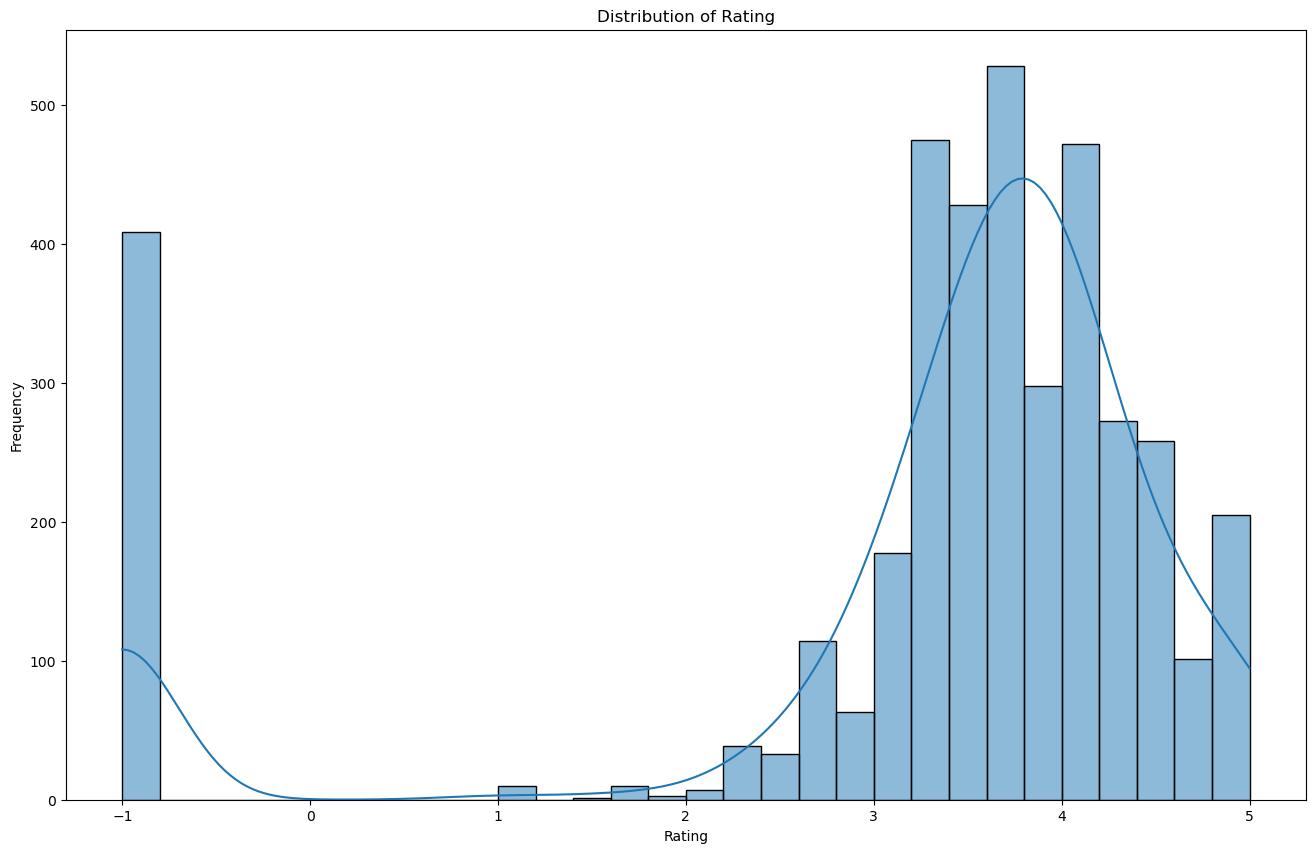

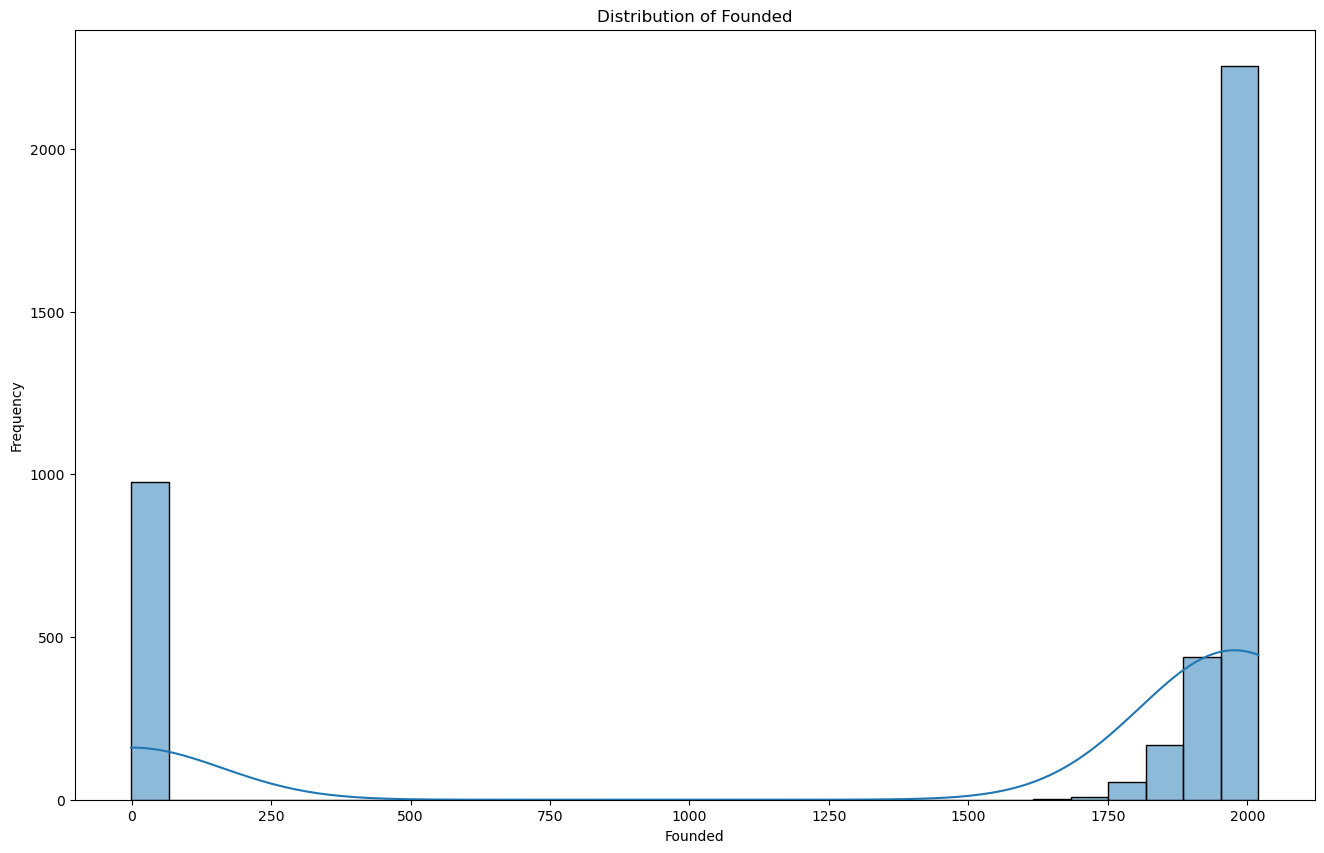

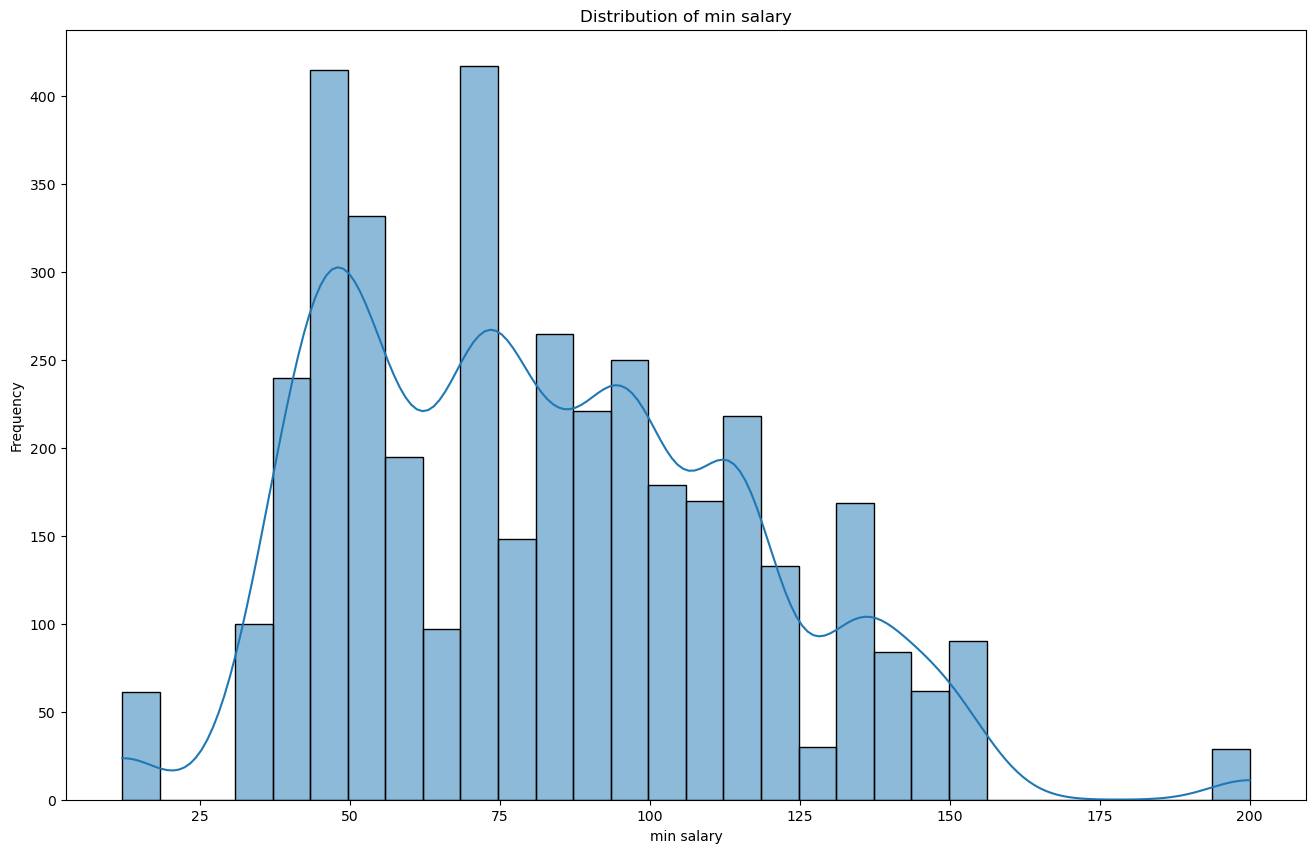

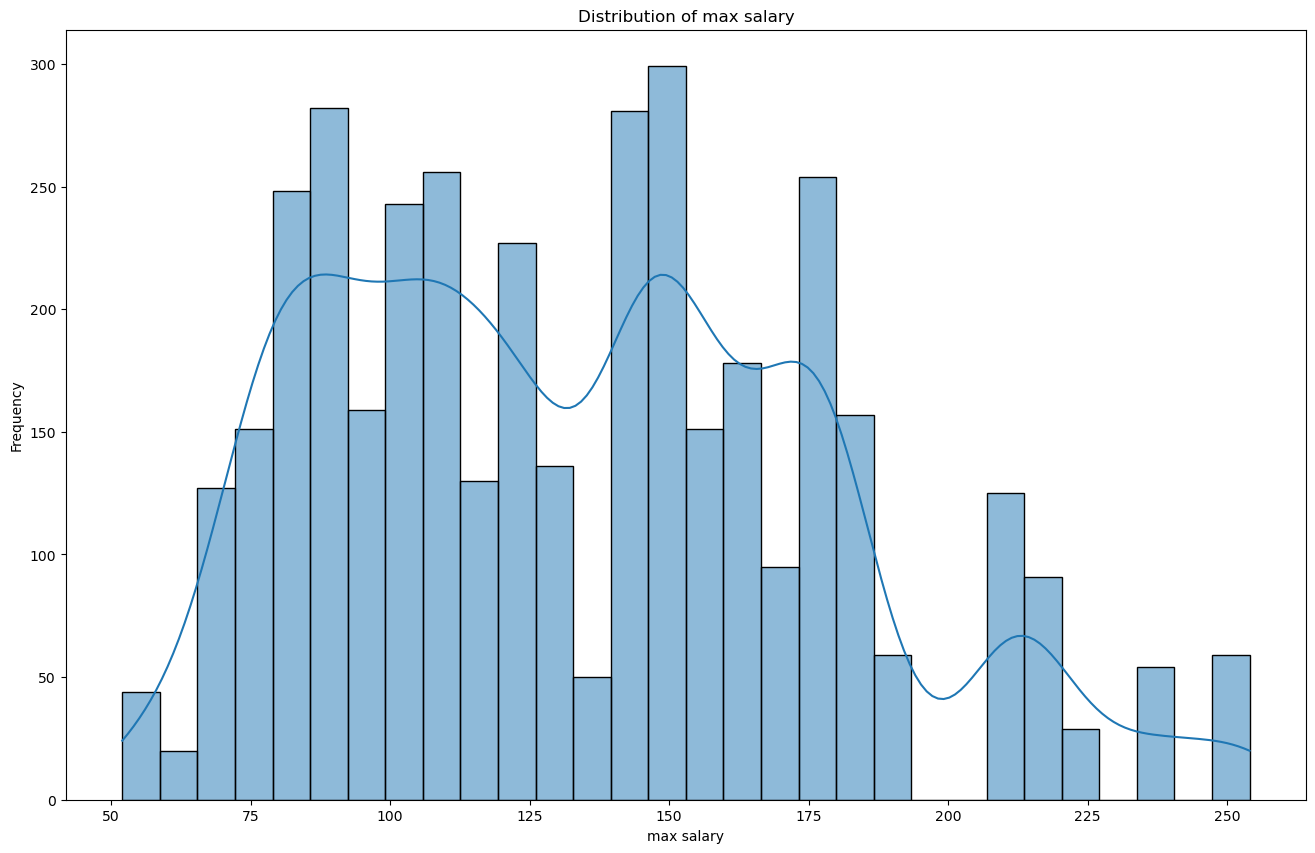

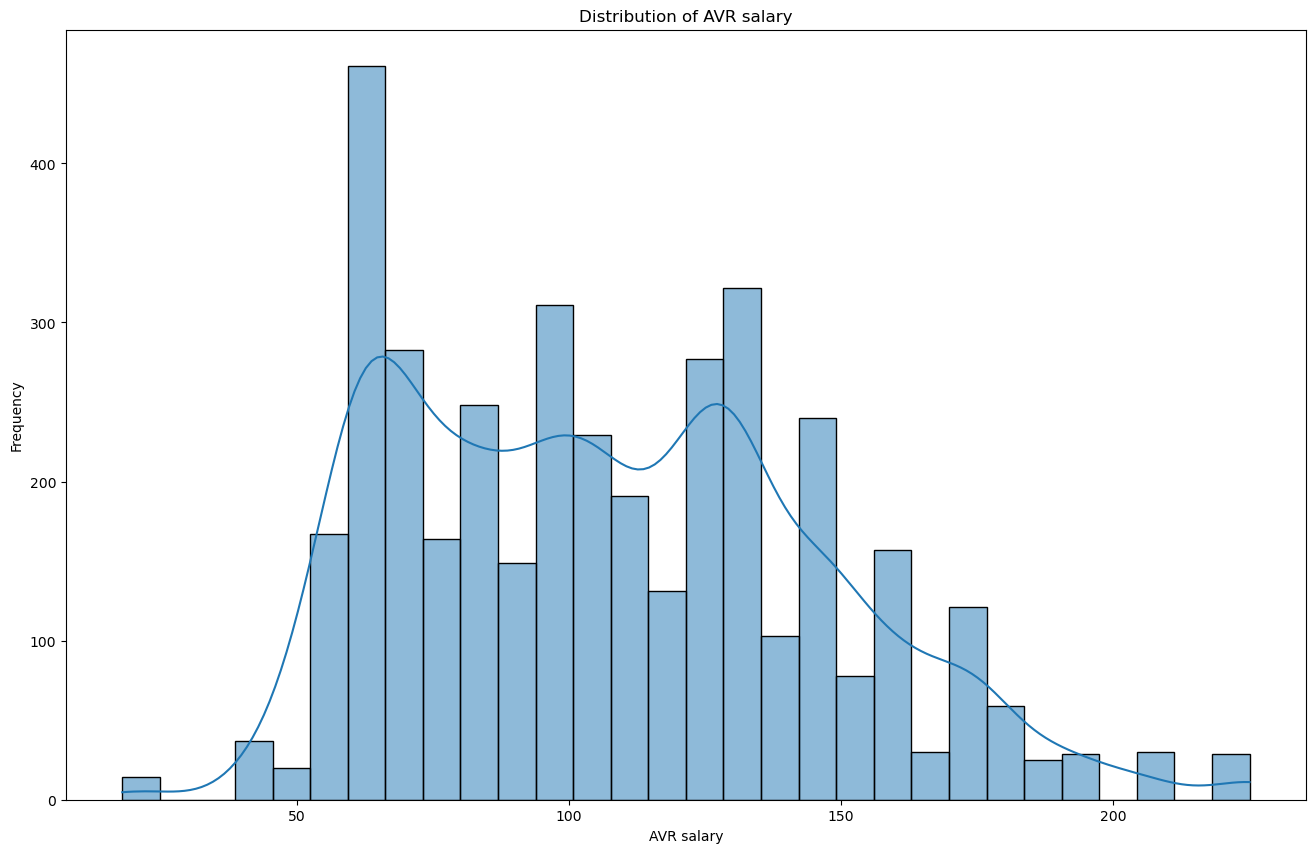

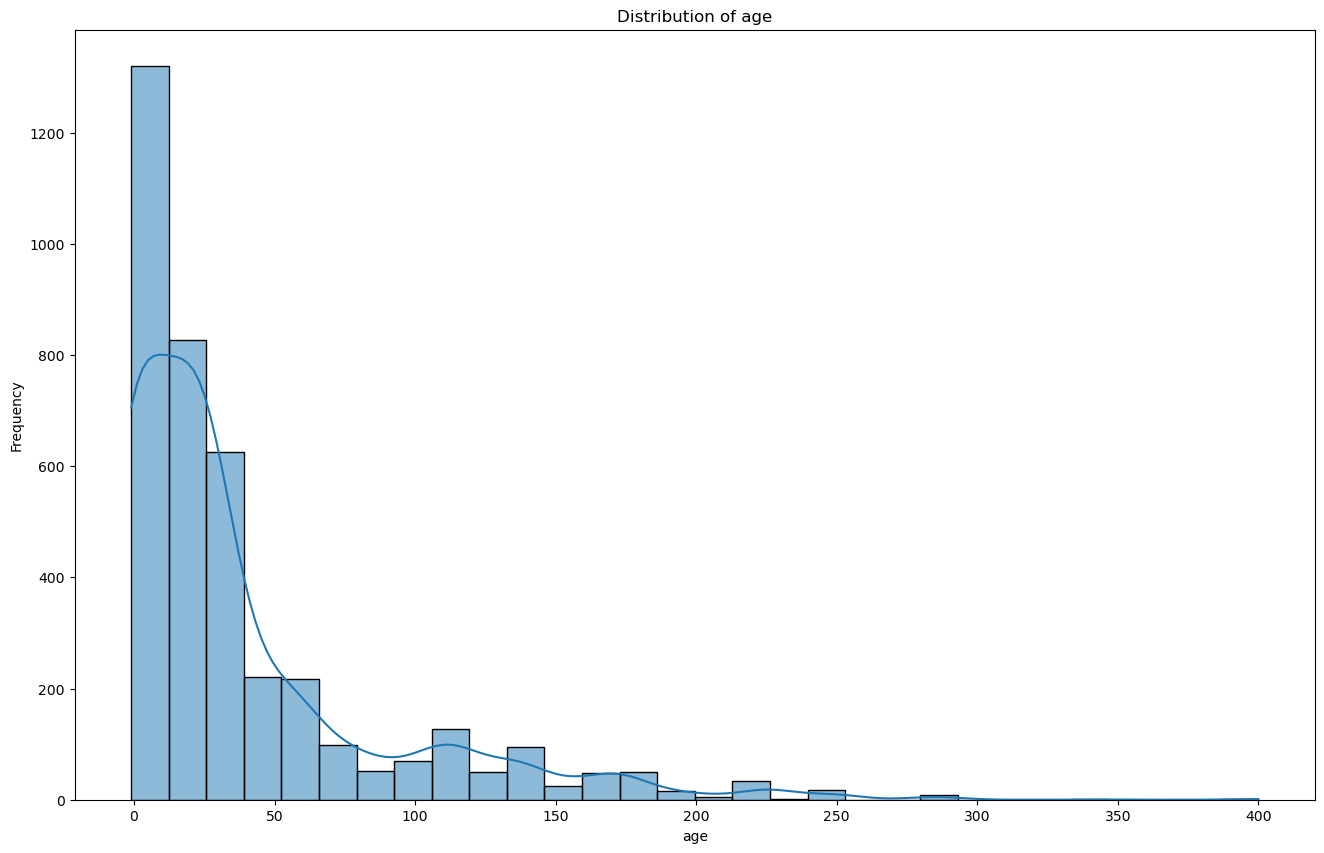

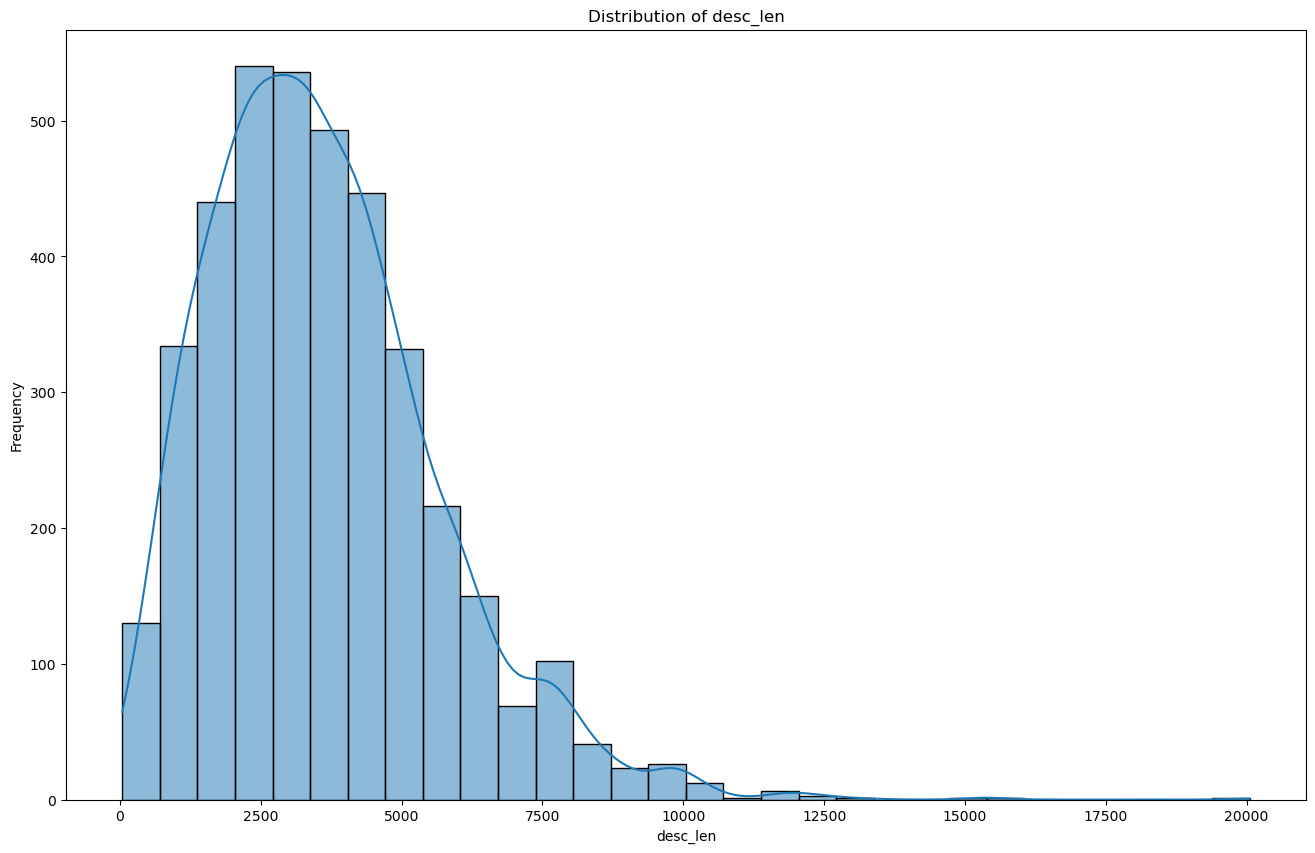

In [39]:
## data visualize for continuous numerical data

# specify continuous data (not including 'index')
continuous_cols = [col for col in df.select_dtypes(include='number').columns if df[col].nunique() > 10][1:]
# plot histogram
for col in continuous_cols:
    plt.figure(figsize=(16, 10))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [ ]:
## explore the correlation for continuous data
